In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from qolmat.analysis.pklm_numpy import PKLMtest

In [2]:
def generate_randunif(N=500):
    Z = np.random.uniform(0,1, N)

    X = np.sort(Z)
    F = np.array(range(N))/float(N)
    
    return X, F

In [3]:
def create_df_with_nan(n_rows: int, n_cols: int, nan_ratio: float) -> pd.DataFrame:
    data = {f"Colonne_{i}": np.random.normal(size=n_rows).astype(float) for i in range(n_cols)}
    df = pd.DataFrame(data)
    nb_valeurs_manquantes = int(nan_ratio * df.size)
    indices_valeurs_manquantes = np.random.choice(df.size, nb_valeurs_manquantes, replace=False)
    df.values.flat[indices_valeurs_manquantes] = np.nan
    return df

In [13]:
N_sim = 500
list_res = []

for _ in range(N_sim):
    p_value = PKLMtest(
        matrix=create_df_with_nan(500, 10, 0.35).to_numpy(),
        nb_projections=100,
        nb_permutations=30,
        nb_trees_per_proj=200
    )
    list_res.append(p_value)

In [14]:
Z_pv = np.array(list_res, dtype=np.float32)
X_pv = np.sort(Z_pv)
F_pv = np.array(range(N_sim))/float(N_sim)

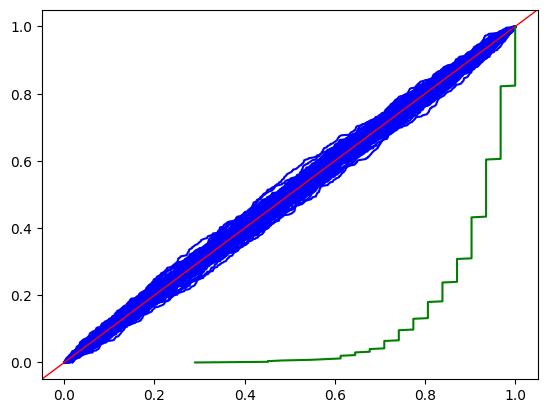

In [15]:
fig, ax = plt.subplots()

for _ in range(100):
    X, F = generate_randunif()
    plt.plot(X, F, 'b')
    
ax.axline((0, 0), (1, 1), linewidth=1, color='r')
plt.plot(X_pv, F_pv, 'g')

plt.show()

In [18]:
X_pv.shape

(500,)